 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
whale_returns_df.isnull().sum().sum()

4

In [5]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
algo_returns_df.isnull().sum().sum()

6

In [9]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [12]:
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close']

C:\Users\pogol\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
               ...   
2012-10-05    1460.93
2012-10-04    1461.40
2012-10-03    1450.99
2012-10-02    1445.75
2012-10-01    1444.49
Name: Close, Length: 1649, dtype: object

In [13]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [14]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)
sp500_returns_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_df = sp500_returns_df.rename(columns={"Close":"S&P500 Returns"})
sp500_returns_df.head()

,S&P500 Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_df = pd.concat([whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
combined_returns_df.dropna()
combined_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

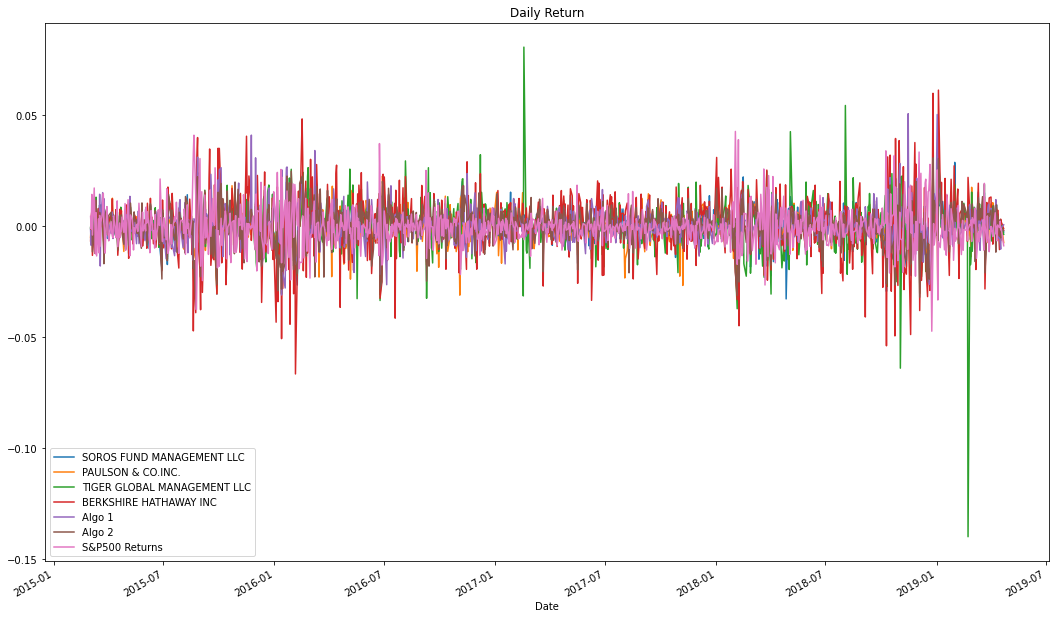

In [18]:
# Plot daily returns of all portfolios
daily_return = combined_returns_df.plot( title ="Daily Return" , figsize=(18, 11))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

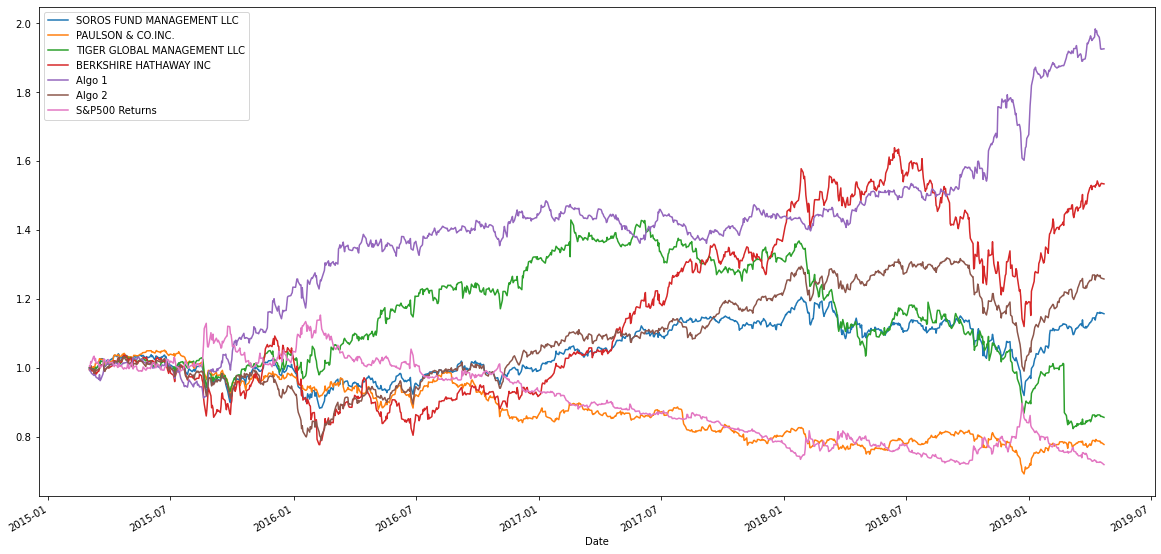

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

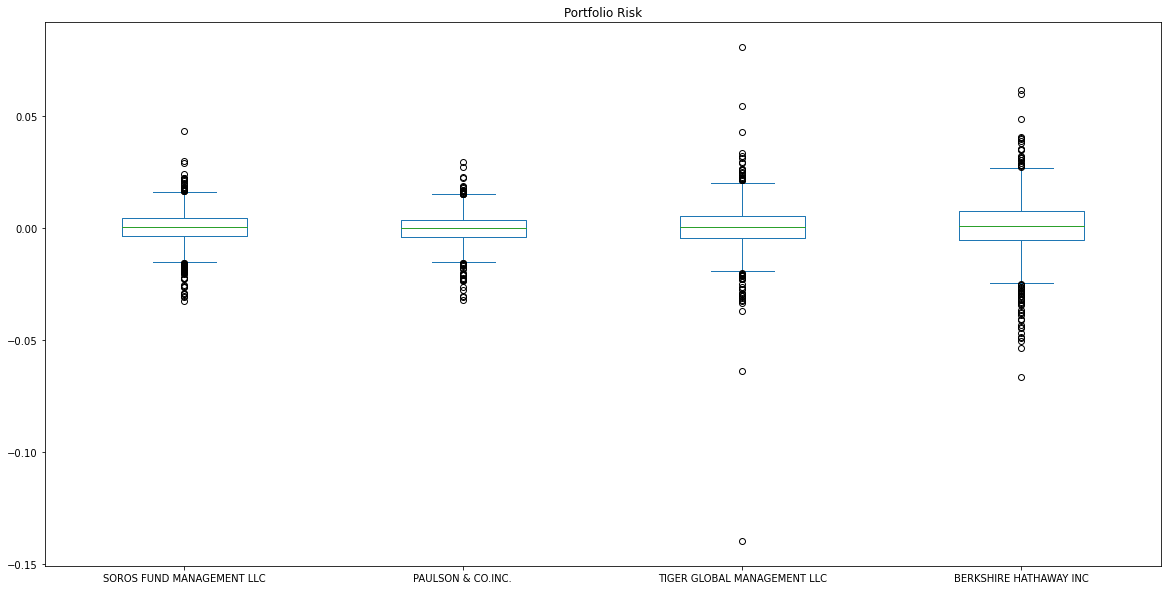

In [20]:
# Box plot to visually show risk
whale_returns_df.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
std = whale_returns_df.std()
std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_returns_df.std()
sp500_std

S&P500 Returns    0.008135
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
riskier_than_SP500_1 = [sp500_std < std['SOROS FUND MANAGEMENT LLC']]
riskier_than_SP500_1

[S&P500 Returns    False
 dtype: bool]

In [24]:
riskier_than_SP500_2 = [sp500_std < std['PAULSON & CO.INC. ']]
riskier_than_SP500_2

[S&P500 Returns    False
 dtype: bool]

In [25]:
riskier_than_SP500_3 = [sp500_std < std['TIGER GLOBAL MANAGEMENT LLC']]
riskier_than_SP500_3

[S&P500 Returns    True
 dtype: bool]

In [26]:
riskier_than_SP500_4 = [sp500_std < std['BERKSHIRE HATHAWAY INC']]
riskier_than_SP500_4

[S&P500 Returns    True
 dtype: bool]

### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = std *np.sqrt(252)
annual_std.sort_values

<bound method Series.sort_values of SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64>

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

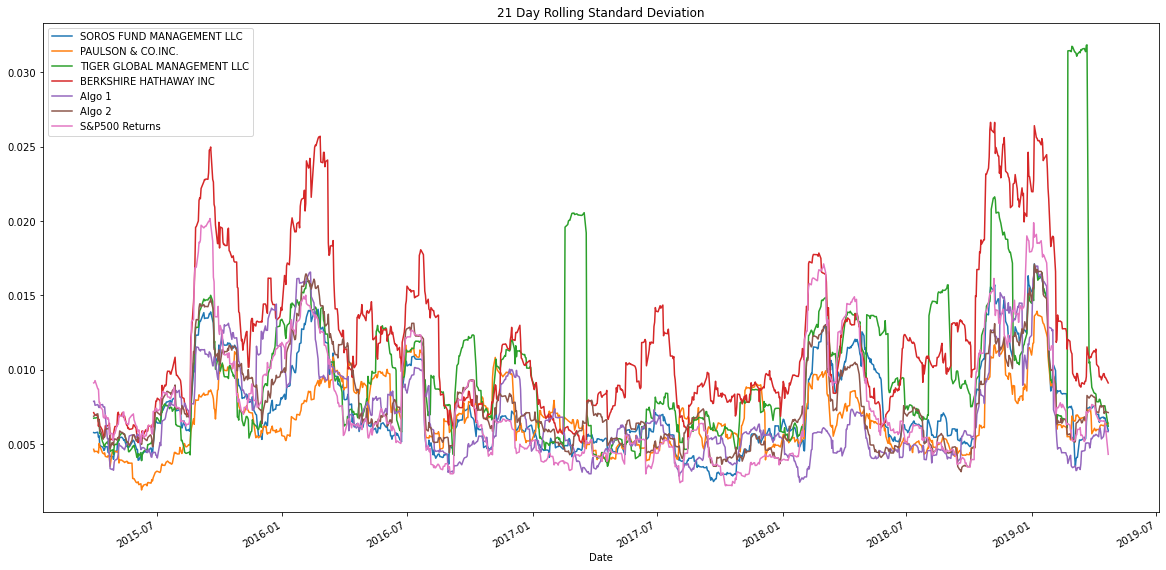

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [29]:
# Calculate the correlation
correlation = combined_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P500 Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

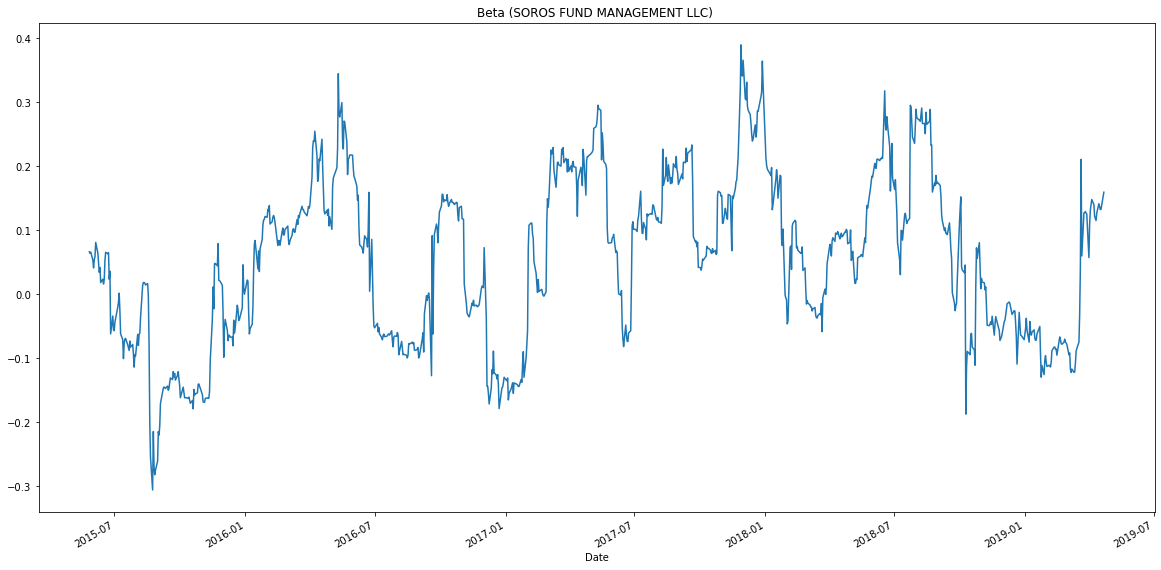

In [30]:
# Calculate covariance of a single portfolio
covariance = combined_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns_df['S&P500 Returns'])
covariance
# Calculate variance of S&P 500
variance = combined_returns_df['S&P500 Returns'].rolling(window=60).var()
variance
# Computing beta
beta = covariance / variance
beta
# Plot beta trend
beta_plot = beta.plot(title="Beta (SOROS FUND MANAGEMENT LLC) ", figsize=(20, 10))

# Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentialy Weighted Moving Average'}, xlabel='Date'>

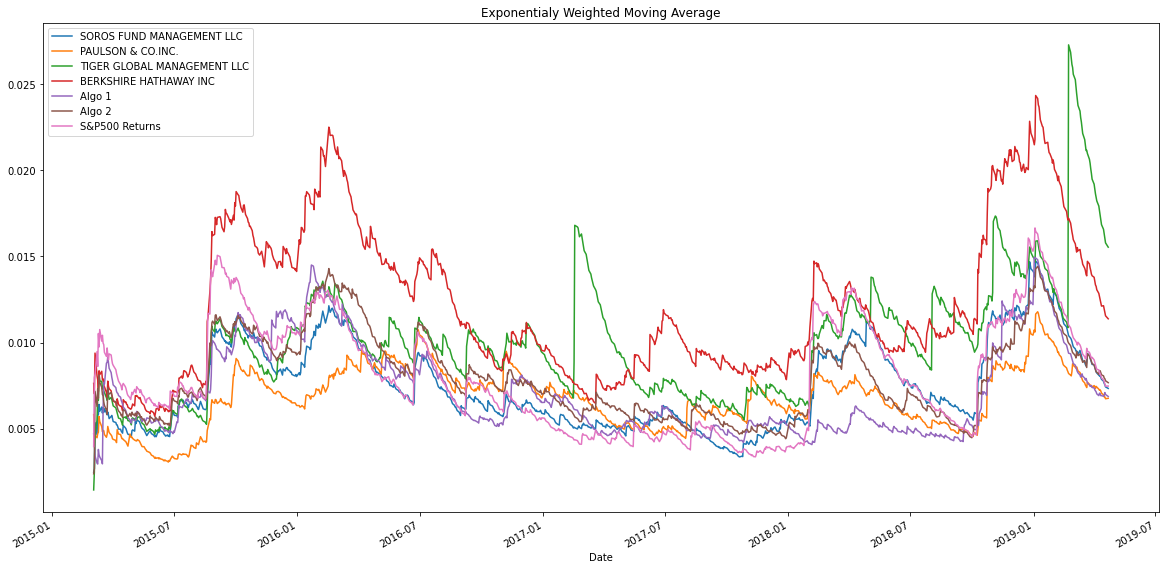

In [31]:
# Use `ewm` to calculate the rolling window
rolling_ewma = combined_returns_df.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Moving Average", figsize=(20, 10))
rolling_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500 Returns                -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

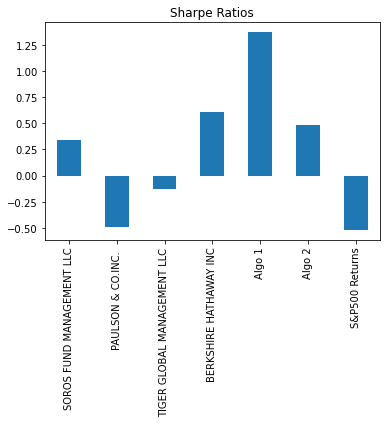

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The strategies do out perform the market and whale portfolio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading data from 1st stock
Costco_csv = Path("Resources/COST - Sheet1.csv")
costco_df = pd.read_csv(Costco_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
costco_df.head()

,Close
Date,
2017-01-03,159.73
2017-01-04,159.76
2017-01-05,162.91
2017-01-06,162.83
2017-01-09,160.97


In [35]:
# Reading data from 2nd stock
Walmart_csv = Path("Resources/WMT - Sheet1.csv")
walmart_df = pd.read_csv(Walmart_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
walmart_df.head()

,Close
Date,
2017-01-03,68.66
2017-01-04,69.06
2017-01-05,69.21
2017-01-06,68.26
2017-01-09,68.71


In [36]:
# Reading data from 3rd stock
Target_csv = Path("Resources/TGT - Sheet1.csv")
target_df = pd.read_csv(Target_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
target_df.head()

,Close
Date,
2017-01-03,72.75
2017-01-04,73.81
2017-01-05,72.56
2017-01-06,71.44
2017-01-09,71.43


In [37]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([costco_df,walmart_df, target_df], axis='columns', join='inner')
combined_df.columns = ['COST', 'WMT', 'TGT']
combined_df.head()

,COST,WMT,TGT
Date,,,
2017-01-03,159.73,68.66,72.75
2017-01-04,159.76,69.06,73.81
2017-01-05,162.91,69.21,72.56
2017-01-06,162.83,68.26,71.44
2017-01-09,160.97,68.71,71.43


In [38]:
# Reset Date index
combined_df.index = combined_df.index.normalize()
combined_df

,COST,WMT,TGT
Date,,,
2017-01-03,159.73,68.66,72.75
2017-01-04,159.76,69.06,73.81
2017-01-05,162.91,69.21,72.56
2017-01-06,162.83,68.26,71.44
2017-01-09,160.97,68.71,71.43
...,...,...,...
2019-12-23,293.31,119.03,128.34
2019-12-24,294.23,119.51,128.55
2019-12-26,295.73,119.52,128.89


In [39]:
# Reorganize portfolio data by having a column per symbol

In [40]:
# Calculate daily returns
combined_returns = combined_df.pct_change()
# Drop NAs
combined_returns.dropna(inplace=True)
# Display sample data
combined_returns.head()

,COST,WMT,TGT
Date,,,
2017-01-04,0.000188,0.005826,0.014570
2017-01-05,0.019717,0.002172,-0.016935
2017-01-06,-0.000491,-0.013726,-0.015436
2017-01-09,-0.011423,0.006592,-0.000140
2017-01-10,0.004287,-0.006986,0.000000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = combined_returns.dot(weights)
# Display sample data
weighted_returns.tail()

Date
2019-12-23   -0.007301
2019-12-24    0.002935
2019-12-26    0.002609
2019-12-27   -0.000803
2019-12-30   -0.000188
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [42]:
# Join your returns DataFrame to the original returns DataFrame
#combined_weighted_returns = pd.concat([weighted_returns, whale_returns_df,algo_returns_df, sp500_returns_df], axis='columns', join='inner')
#combined_weighted_returns.columns.values[0] = "Weighted"
#combined_weighted_returns.tail()
combined_returns_df["Weighted"] = weighted_returns
combined_returns_df.dropna().tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500 Returns,Weighted
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.014051
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000247
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.003931
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.002742
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,-0.010822


In [43]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [44]:
# Calculate the annualized `std`
std2 = combined_returns_df.std()
annual_std2 = std2 *np.sqrt(252)
annual_std2.sort_values

<bound method Series.sort_values of SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P500 Returns                 0.136313
Weighted                       0.183779
dtype: float64>

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

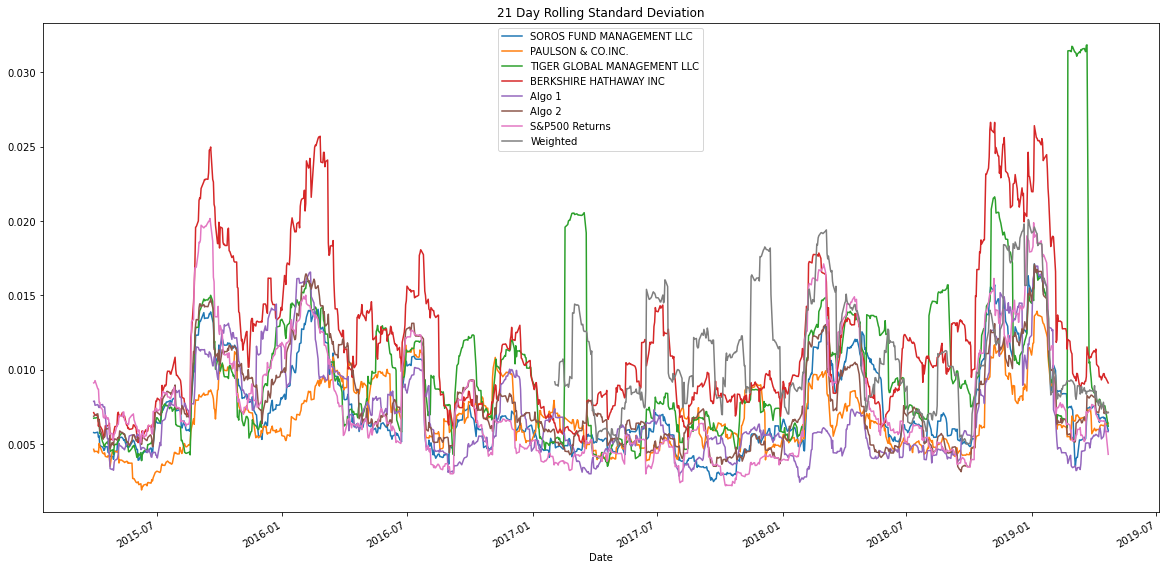

In [54]:
# Calculate rolling standard deviation
combined_returns_df.rolling(window=21).std().dropna()
# Plot rolling standard deviation
combined_returns_df.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation'}>

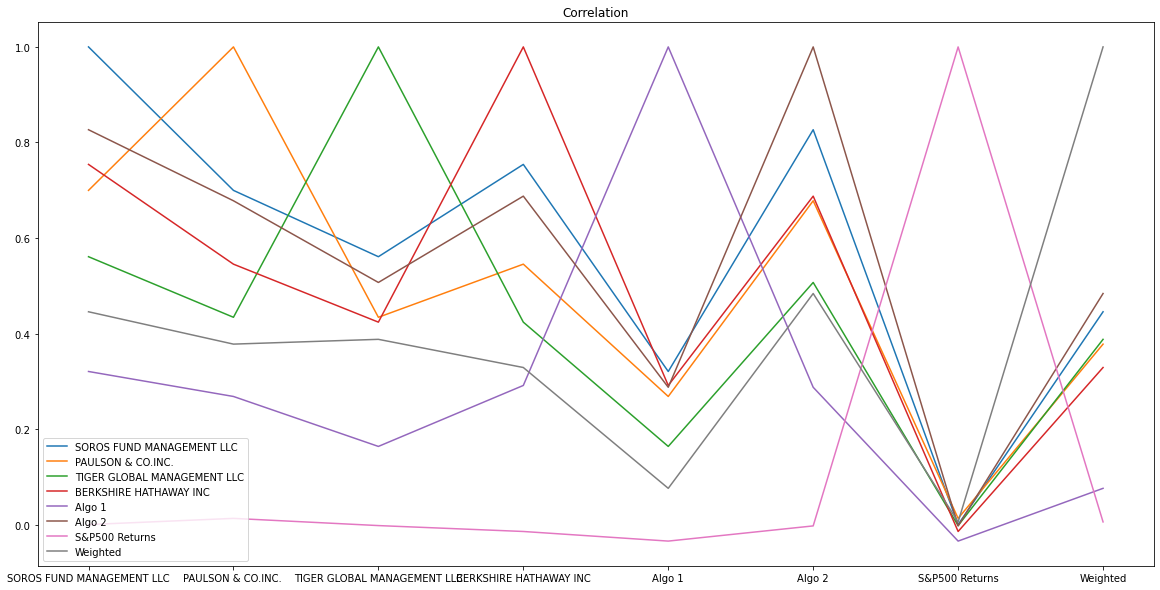

In [57]:
# Calculate and plot the correlation
combined_returns_df.corr().plot(title="Correlation", figsize=(20,10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

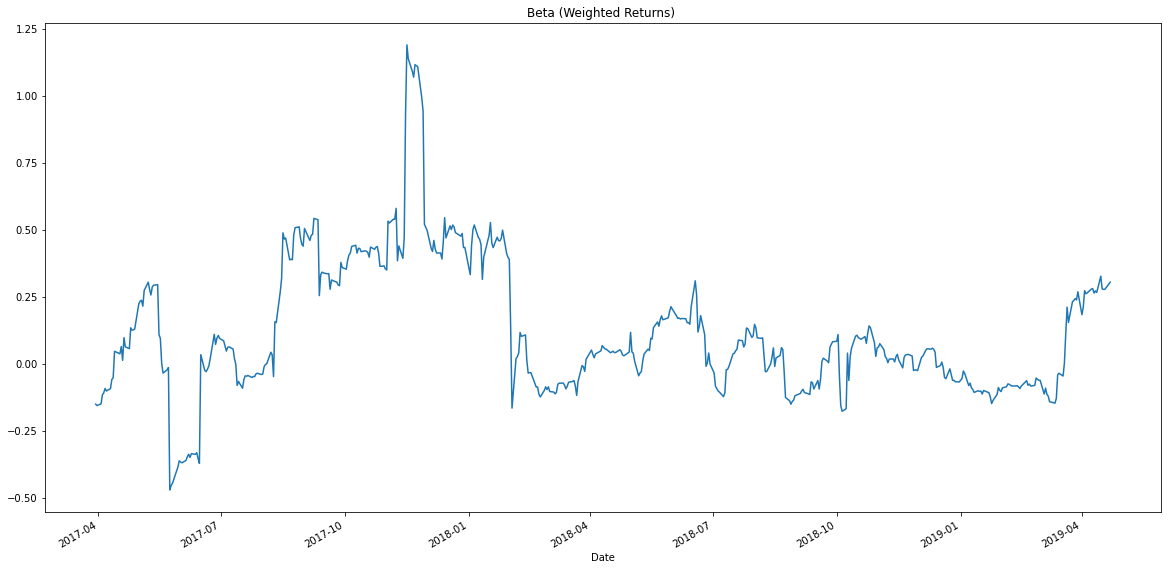

In [58]:
# Calculate and plot Beta
covariance = combined_returns_df['Weighted'].rolling(window=60).cov(combined_returns_df['S&P500 Returns'])
covariance
# Calculate variance of S&P 500
variance = combined_returns_df['S&P500 Returns'].rolling(window=60).var()
variance
# Computing beta
beta = covariance / variance
beta
# Plot beta trend
beta_plot = beta.plot(title="Beta (Weighted Returns) ", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Calculate Annualized Sharpe Ratios
combined_returns2_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
combined_returns2_ratios.sort_values(ascending=False)

Algo 1                         1.369589
Weighted                       0.895497
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P500 Returns                -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

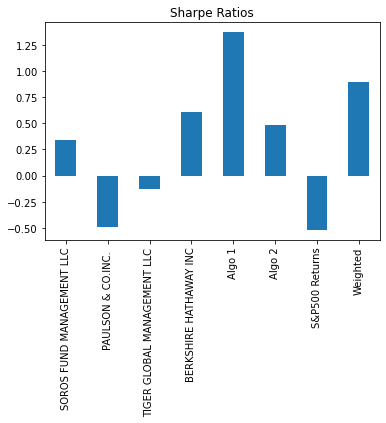

In [61]:
# Visualize the sharpe ratios as a bar plot
combined_returns2_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio performed alrighted, especially considering I choose general commodities.